In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
data=pd.read_csv('../Feature Engineering/data_post_pca.csv')
data.head()
# %run '../Feature Engineering/Sampling.ipynb'
# data=upsample(data)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,label
0,2.794368,-0.929013,-1.352207,-1.894582,-1.085846,0.771788,1.839418,-2.615483,-0.059991,0.044185,...,1.961615,1.100890,-0.787425,2.446992,-2.013049,-0.542423,0.699501,-1.056877,-0.473579,0
1,2.820408,-0.833275,-1.416625,-1.918122,-1.035612,0.837798,1.751735,-1.496599,-1.691294,0.662860,...,2.198973,1.464718,-1.834300,1.974253,-1.702338,-0.652710,1.093243,-0.990536,-0.404779,0
2,3.043952,-1.095973,-1.419116,-1.937040,-0.991816,0.867231,1.768446,-1.925914,-1.355337,0.542201,...,1.419045,1.099326,0.017965,2.057412,-0.433378,-0.739313,0.731974,-0.402946,-0.534178,0
3,2.795196,-0.919856,-1.354005,-1.882509,-1.064288,0.773601,1.823199,-2.564977,-0.096437,0.347815,...,1.464408,1.295067,-0.553315,2.460267,-2.028227,-0.531742,0.678040,-1.026959,-0.479243,0
4,2.638791,-1.274479,-1.869114,0.273693,-0.576512,0.671298,1.884216,-3.097545,0.585042,1.840935,...,0.477109,1.327528,0.134552,1.384797,-0.533449,-0.995775,0.922293,-0.151628,-0.789652,0


In [9]:
# Split the data into features and target label
X_pca = data.drop('label', axis=1)
y = data['label']
# y.head()

In [19]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

%run '../Feature Engineering/Sampling.ipynb'
df_train=X_train
df_train['label']=y_train
df_train=downsample(df_train)
X_train=df_train.drop('label',axis=1)
y_train=df_train['label']

gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Evaluate the classifier on the test data
accuracy = gnb.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7388454218650877


/var/folders/g2/vk4vm02n3cng67bqls1m0knw0000gn/T/ipykernel_93374/3941778492.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  downsampled_data = downsampled_data.append(downsampled_group)
/var/folders/g2/vk4vm02n3cng67bqls1m0knw0000gn/T/ipykernel_93374/3941778492.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  downsampled_data = downsampled_data.append(downsampled_group)


In [11]:
# y.head()

Accuracy: 0.7388454218650877
Precision: 0.298
Recall: 0.358604091456077
F1 Score: 0.3255051884216275
Confusion Matrix [[3196  702]
 [ 533  298]]


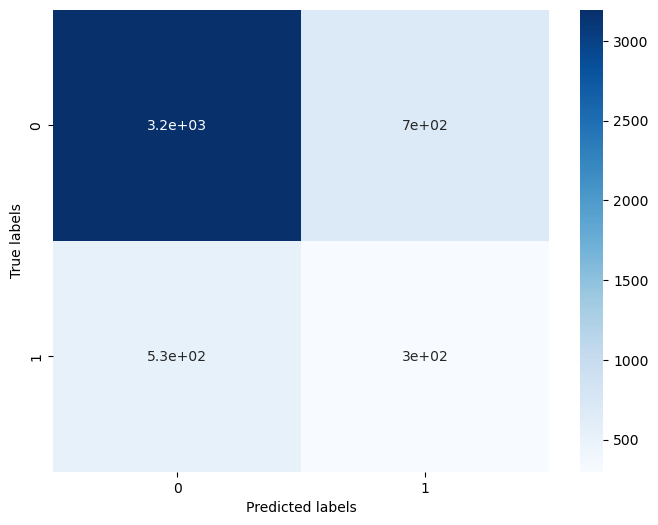

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred=gnb.predict(X_test)


%run performance.ipynb

performance_scores(y_pred,y_test)
